## Лабораторная работа №1 по Системам аналитических решений 
### Cтудент: Артамонов Олег
### Группа: М80-208Б-19 

**Часть 1 - Квадратик**

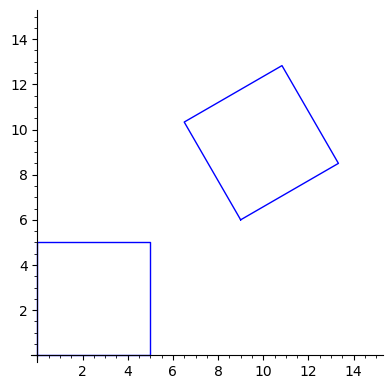

In [1]:
import math

# Функция для параллельного переноса фигур с 4мя координатами
def parallel_move(list_coords, dx=0, dy=0):
    for i in range(5):
        list_coords[i, 0] = list_coords[i, 0] + dx
        list_coords[i, 1] = list_coords[i, 1] + dy
    return list_coords
        

# Задаем квадрат матрицей и длину стороны
side = 5
rectangle_src = matrix([[0,0], [0, side], [side, side], [side, 0], [0, 0]])

# Задаем угол в 30 градусов и матрицу поворота (против часовой стрелки) этим углом; 
alpha = math.radians(30)
mat_rot = matrix([
    [cos(alpha), sin(alpha)],
    [-sin(alpha), cos(alpha)]
])

# Получаем повернутый квадрат, умножив координаты квадрата на матрицу поворота
rectangle_another = rectangle_src * mat_rot

# Применяем функцию для параллельного переноса повернутого квадрата на 9 вправо по x и на 6 вверх по y
rectangle_another = parallel_move(rectangle_another, 9, 6)

# Отображаем эти два квадрата, задаем прорисовку от 0 до 15 (по x и y),
# соотношение между единичными отрезками осей на экране равно 1
show(line(rectangle_src) + line(rectangle_another), xmin=0, xmax=15, ymin=0, ymax=15, aspect_ratio=1)

**Часть 2 - Исследование функции**

**Номер задания: 2**

In [2]:
show("Функция:", sqrt(abs(3*x**3 + 2*x**2 - 10*x)) / (4*x))

'Функция:' 1/4*sqrt(abs(3*x^3 + 2*x^2 - 10*x))/x

Для заданной формулой функции найти:
<ol>
    <li>Область определения функции.</li>
    <li>Является ли функция четной или нечетной, является ли периодической.</li>
    <li>Точки пересечения графика с осями координат.</li>
    <li>Промежутки знакопостоянства.</li>
    <li>Промежутки возрастания и убывания.</li>
    <li>Точки экстремума и значения в этих точках.</li>
    <li>Непрерывность. Наличие точек разрыва и их классификация.</li>
    <li>Асимптоты.</li>
</ol>
Построить график функции, асимптоты, промежутки знакопостоянства. (см. папку с материалами).<br>
Необходимо также сделать минимальное, но оформление решения, а не просто набор ответов.

График функции: 


1/4*sqrt(abs(3*x^3 + 2*x^2 - 10*x))/x

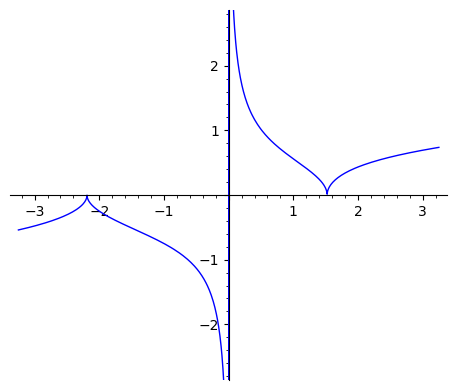

In [3]:
# Определим функцию и выведем ее график:
y(x) = sqrt(abs(3*x**3 + 2*x**2 - 10*x)) / (4*x)
print("График функции: ")
show(y(x))
plot(y, xmin = -3.25, xmax = 3.25, ymin = -2.75, ymax = 2.75, aspect_ratio=1, thickness=1)

**1. Область определения функции.**  

Единственное ограничение у нас по функции x в знаменателе - это x$\not=$0.

D : x $\neq$ 0

**2. Является ли функция четной или нечетной, является ли периодической.**

Проверка на четность:

In [4]:
(y(x) - y(-x)).simplify()

1/4*sqrt(abs(3*x^3 + 2*x^2 - 10*x))/x + 1/4*sqrt(abs(3*x^3 - 2*x^2 - 10*x))/x

Проверка на нечетность:

In [5]:
(y(x) - (-y(-x))).simplify()

1/4*sqrt(abs(3*x^3 + 2*x^2 - 10*x))/x - 1/4*sqrt(abs(3*x^3 - 2*x^2 - 10*x))/x

Проверка на периодичность:

In [6]:
var('x T')
eq = y(x) - y(x + T)
eq.simplify_full()
show(eq)

-1/4*sqrt(abs(3*(T + x)^3 + 2*(T + x)^2 - 10*T - 10*x))/(T + x) + 1/4*sqrt(abs(3*x^3 + 2*x^2 - 10*x))/x

Посмотрев на график функции или на функцию под корнем, сразу становится понятно, что исходная функция не четная, не нечетная и не периодичная, но мы убедились в этом аналитически.

**3. Точки пересечения графика с осями координат.**  

Из области определения x $\neq$ 0 можно заключить, что точки пересечения графика функции с осью ординат отсутствуют. 

Теперь найдем точки пересечения с осью абсцисс:

In [7]:
anss = solve(y==0, x)
for ans in anss:
    show(ans.rhs())

-1/3*sqrt(31) - 1/3

1/3*sqrt(31) - 1/3

0

Последний корень, очевидно, не подходит из-за ограничений области определения, первые два - искомые корни. Запомним их.

In [8]:
root1_value = anss[0].rhs().n()
root2_value = anss[1].rhs().n()

**4. Промежутки знакопостоянства.**

In [9]:
solve(y(x)>=0, x, algorithm='sympy')

[[x == -1/3*sqrt(31) - 1/3], [x > 0]]

In [10]:
solve(y(x)<0, x, algorithm='sympy')

[[x < -1/3*sqrt(31) - 1/3], [[x > -1/3*sqrt(31) - 1/3], [x < 0]]]

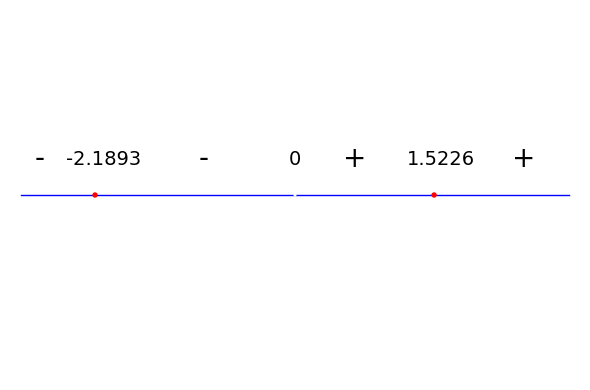

In [28]:
intervals_of_constancy = plot(0, xmin=-3, xmax=3, ymin=-0.5, ymax=0.5)

intervals_of_constancy += point((0, 0), color="white", size=5, zorder=10)
intervals_of_constancy += point((root1_value, 0), color="red", size=15, zorder=10)
intervals_of_constancy += point((root2_value, 0), color="red", size=15, zorder=10)
x_margin = 0.1
intervals_of_constancy += text(0, (0, x_margin), color="black", fontsize=14)
intervals_of_constancy += text(round(root1_value, 4), (-2.1, x_margin), color="black", fontsize=14)
intervals_of_constancy += text(round(root2_value, 4), (1.6, x_margin), color="black", fontsize=14)
y_margin = 0.1
intervals_of_constancy += text("-", (-2.8, y_margin), color="black", fontsize=20)
intervals_of_constancy += text("-", (-1, y_margin), color="black", fontsize=20)
intervals_of_constancy += text("+", (0.65, y_margin), color="black", fontsize=20)
intervals_of_constancy += text("+", (2.5, y_margin), color="black", fontsize=20)


intervals_of_constancy.show(axes=False)

**5. Промежутки возрастания и убывания.**  

Для нахождения промежутков найдем производную и ее интервалы знакопостоянства

In [12]:
derv = y(x).derivative()
derv.show()

1/16*((3*conjugate(x)^3 + 2*conjugate(x)^2 - 10*conjugate(x))*(9*x^2 + 4*x - 10) + (3*x^3 + 2*x^2 - 10*x)*(9*conjugate(x)^2 + 4*conjugate(x) - 10))/(x*abs(3*x^3 + 2*x^2 - 10*x)^(3/2)) - 1/4*sqrt(abs(3*x^3 + 2*x^2 - 10*x))/x^2

In [13]:
solve(derv > 0, x, algorithm='sympy')

[[x < -1/3*sqrt(31) - 1/3], [x > 1/3*sqrt(31) - 1/3]]

In [14]:
solve(derv < 0, x, algorithm='sympy')

[[[x > -1/3*sqrt(31) - 1/3], [x < 0]], [[x > 0], [x < 1/3*sqrt(31) - 1/3]]]

Выведем график производной:

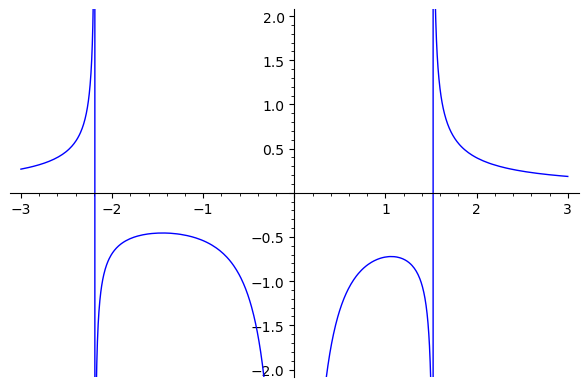

In [26]:
plot(derv, xmin = -3, xmax = 3, ymin = -2, ymax = 2)

Теперь отобразим это на промежутках:

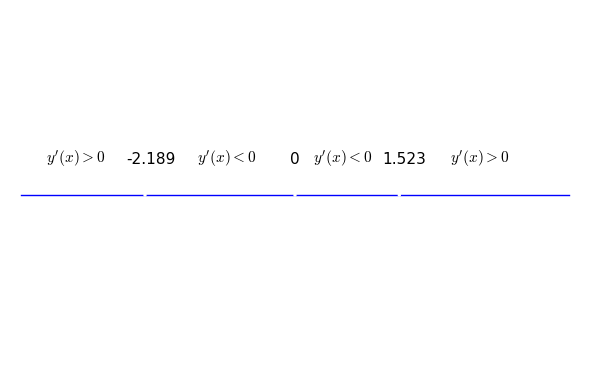

In [27]:
intervals_of_constancy = plot(0, xmin=-4, xmax=4, ymin=-0.5, ymax=0.5)

intervals_of_constancy += point((0, 0), color="white", size=6, zorder=10)
intervals_of_constancy += point((root1_value, 0), color="white", size=6, zorder=10)
intervals_of_constancy += point((root2_value, 0), color="white", size=6, zorder=10)
x_margin = 0.1
intervals_of_constancy += text(0, (0, x_margin), color="black", fontsize=11)
intervals_of_constancy += text(round(float(root1_value), 3), (-2.1, x_margin), color="black", fontsize=11)
intervals_of_constancy += text(round(float(root2_value), 3), (1.6, x_margin), color="black", fontsize=11)
y_margin = 0.1
intervals_of_constancy += text("$y'(x) > 0$", (-3.2, y_margin), color="black", fontsize=11)
intervals_of_constancy += text("$y'(x) < 0$", (-1, y_margin), color="black", fontsize=11)
intervals_of_constancy += text("$y'(x) < 0$", (0.7, y_margin), color="black", fontsize=11)
intervals_of_constancy += text("$y'(x) > 0$", (2.7, y_margin), color="black", fontsize=11)


intervals_of_constancy.show(axes=False)

На промежутках, где производная больше нуля - функция возврастает, на промежутках, где она меньше - убывает. Точки, где исходная функция зануляется, производная не существуют, так как накладывается ограничение из-за знаменателя.

**6. Точки экстремума и значения в этих точках.**    

По графику функции можно понять, что экстремумы находятся в корнях, первый корень (левый) - локальная точка максимума с значением 0, второй корень (правый) - локальная точка максимума с значением 0

Первая точка:

In [17]:
round(y(root1_value-0.05), 6)

-0.125497

In [18]:
round(y(root1_value), 6)

-0.0

In [19]:
round(y(root1_value+0.05), 6)

-0.126679

Вторая точка:

In [20]:
round(y(root2_value-0.05), 6)

0.152684

In [21]:
round(y(root2_value), 6)

0.0

In [22]:
round(y(root2_value+0.05), 6)

0.149754

Функция round() использовалась только для наглядности, чтобы отображать фиксированное количество цифр.

**7. Непрерывность. Наличие точек разрыва и их классификация.**  

Функция непрерывна на D, а в точке $x = 0$ разрыв второго рода - левосторнний и правосторонний пределы равны бесконечностям:

In [23]:
limit(y, x=-0)

x |--> Infinity

In [24]:
limit(y, x=+0)

x |--> Infinity

**8. Асимптоты.**

Уравнения наклонных асимптот ищут в виде $y = kx + b$.

Нахождение коэффициента $k = \lim_{x\to\infty} (y(x) / x)$

Нахождение коэффициента $b = \lim_{x\to\infty} (y(x) - kx)$

In [30]:
lim(y(x)/x, x=infinity)

0

In [31]:
lim(y, x=infinity)

x |--> +Infinity

Наклонной или горизонтальной ассимптоты не существует, но существует вертикальная при $x = 0$, это мы узнали в начале из области определения.